In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import math

# 1. Error Function

Text(0, 0.5, 'erf(x)')

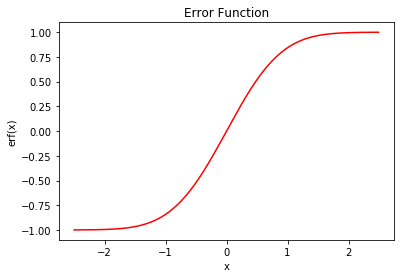

In [21]:
# 에러함수를 수치적분을 이용하여 구하고 그래프를 그려라.
def func(x):
    return np.exp(-x**2)

x = np.arange(-2.5,2.5,0.01)
A = []
for i in x :
    F,err = integrate.quad(func,0,i)
    s = (2/np.pi**(1/2))*F
    A.append(s)

plt.plot(x,A,color = "r")
plt.title("Error Function")
plt.xlabel("x")
plt.ylabel("erf(x)")

In [3]:
#에러함수를 테일러 전개했을 때, 테일러 전개식과 적분결과를 그래프로 그리고 비교하여라.
def facto(x) :
  f,n = 1,1
  while(n<=x) :
    f=f*n
    n=n+1
  return f

x = np.arange(-2.5,2.5,0.01)
def erf(x,n):
    i,s = 0,0
    while (i<=n) :
        s = s + (2/np.pi**(1/2))*((-1)**i)*x**(2*i+1)/((2*i+1)*facto(i))
        i += 1
    return s

Text(0, 0.5, 'erf(x)')

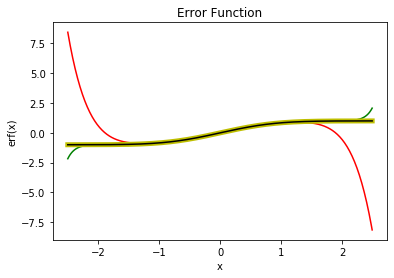

In [4]:
plt.plot(x, erf(x,3),color = "r")
plt.plot(x, erf(x,10), color = "g")
plt.plot(x, erf(x,30), color = "y",linewidth='5')
plt.plot(x, erf(x,30), color = "k")
plt.title("Error Function")
plt.xlabel("x")
plt.ylabel("erf(x)")

# n값이 커지면서의 에러함수의 테일러 전개식의 적분결과를 표현함.

# 2. Integration

In [5]:
# sin함수 (trapezoidal 방법)

def f(x):
    return np.sin(x)

def trapez(f,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s = s+ dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

trapez(f,0,6,100),

(0.02479518745630469,)

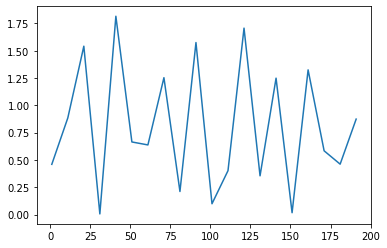

In [6]:
xdata=np.arange(1,200,10)
ydata=np.array([trapez(f,0,i,100) for i in xdata])
plt.plot(xdata,ydata)

In [7]:
# scipy.integrate 함수 이용 방법

integrate.quad(f,0,np.pi)

(2.0, 2.220446049250313e-14)

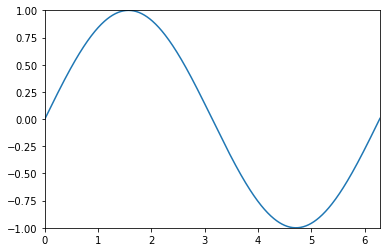

In [8]:
xdata = np.arange(0,np.pi*8,0.01)
plt.xlim(0,np.pi*2);plt.ylim(-1,1)
plt.plot(xdata,f(xdata));

In [9]:
# cos함수 (trapezoidal 방법)

def g(x):
    return np.cos(x)

def trapez(g,c,d,m):
    S, x, dx = 0, c, (d-c)/m
    while(x<d):
         S = S + dx*(0.5*g(x)+0.5*g(x+dx))
         x = x + dx
    return S

trapez(g,0,6,100)

-0.2212706387807927

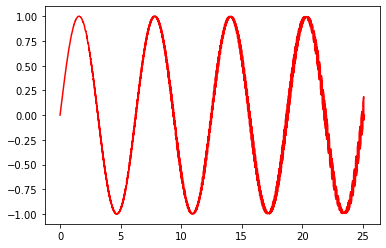

In [10]:
xdate=np.arange(0,200,10)
ydata=np.array([trapez(g,0,i,100) for i in xdata])
plt.plot(xdata,ydata,color='r')

In [11]:
# scipy.integrate 방법

integrate.quad(g,0,np.pi/2)

(0.9999999999999999, 1.1102230246251564e-14)

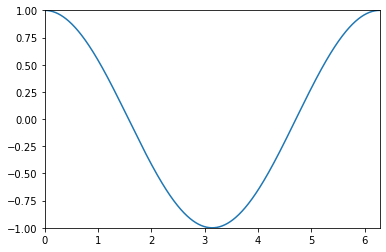

In [12]:
xdata = np.arange(0,np.pi*8,0.01)
plt.xlim(0,np.pi*2);plt.ylim(-1,1)
plt.plot(xdata,g(xdata));

# 3. Differentiation

In [13]:
# sin 함수 (finite difference 방법)

def f(x):
    return np.sin(x)

def cen_diff(f,x,dx):
    return (f(x+dx/2)-f(x-dx/2))/dx

def sec_diff(f,x,dx):
    return (f(x+dx)+f(x-dx)-2*f(x))/dx**2

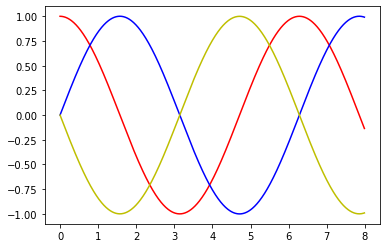

In [14]:
dx = 0.1
xdata=np.arange(0,8,0.01)
diff1=[cen_diff(f,i,dx) for i in xdata]
sdiff=[sec_diff(f,i,dx) for i in xdata]

plt.plot(xdata,diff1,color='r')
plt.plot(xdata,f(xdata),color='b')
plt.plot(xdata,sdiff,color='y')

In [15]:
#scipy.misc.derivative 함수 이용 방법

from scipy.misc import derivative
derivative(np.sin,np.pi/3,dx=0.01)

0.49999166670833817

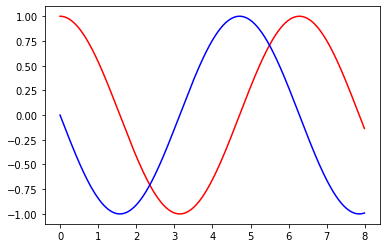

In [16]:
plt.plot(xdata,[derivative(np.sin,i,dx=0.01) for i in xdata],color='r')
plt.plot(xdata,[derivative(np.sin,i,dx=0.01,n=2) for i in xdata],color='b')

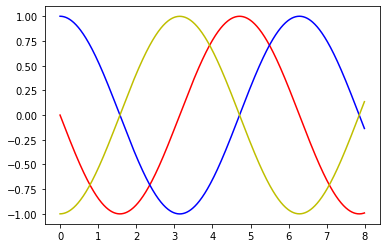

In [17]:
# cos함수 (finite difference 방법)

def g(x):
    return np.cos(x)

dx = 0.1
xdata=np.arange(0,8,0.01)
diff1=[cen_diff(g,i,dx) for i in xdata]
sdiff=[sec_diff(g,i,dx) for i in xdata]

plt.plot(xdata,diff1,color='r')
plt.plot(xdata,g(xdata),color='b')
plt.plot(xdata,sdiff,color='y')

In [18]:
#scipy.misc.derivative 함수 이용 방법

from scipy.misc import derivative
derivative(np.cos,np.pi/3,dx=0.01)

-0.8660109700998758

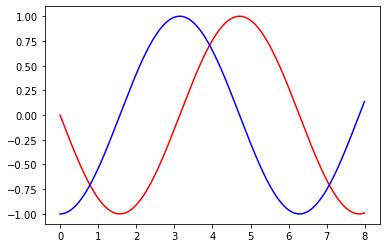

In [19]:
plt.plot(xdata,[derivative(np.cos,i,dx=0.01) for i in xdata],color='r')
plt.plot(xdata,[derivative(np.cos,i,dx=0.01,n=2) for i in xdata],color='b')

적분 (-2) - cos 함수를 trapezoidal 한 것과 같이 다른 모든 경우에 대해서도 해야 했음